In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('diabetes.csv')
df[0:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

0.0


In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
x = df.copy()
y = x.pop('Outcome')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
from sklearn.metrics import accuracy_score

## logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.47 %


## Navie bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [14]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.22 %


## Support Vector Machine

In [15]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [16]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.82 %


## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [18]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 75.97 %


## XG Boost

In [19]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[18:40:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [20]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 75.97 %


## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Neural Network

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                99        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10)

Epoch 1/200
62/62 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.5586 - val_loss: 0.6417 - val_accuracy: 0.7143
Epoch 2/200
62/62 [==============================] - 0s 902us/step - loss: 0.6407 - accuracy: 0.6466 - val_loss: 0.5720 - val_accuracy: 0.7727
Epoch 3/200
62/62 [==============================] - 0s 902us/step - loss: 0.5888 - accuracy: 0.7003 - val_loss: 0.5261 - val_accuracy: 0.7922
Epoch 4/200
62/62 [==============================] - 0s 884us/step - loss: 0.5533 - accuracy: 0.7264 - val_loss: 0.4931 - val_accuracy: 0.7792
Epoch 5/200
62/62 [==============================] - 0s 923us/step - loss: 0.5268 - accuracy: 0.7459 - val_loss: 0.4695 - val_accuracy: 0.7922
Epoch 6/200
62/62 [==============================] - 0s 910us/step - loss: 0.5096 - accuracy: 0.7492 - val_loss: 0.4528 - val_accuracy: 0.7857
Epoch 7/200
62/62 [==============================] - 0s 939us/step - loss: 0.4968 - accuracy: 0.7590 - val_loss: 0.4423 - val_accuracy: 0.8052
E

62/62 [==============================] - 0s 868us/step - loss: 0.4448 - accuracy: 0.7883 - val_loss: 0.4374 - val_accuracy: 0.7922
Epoch 59/200
62/62 [==============================] - 0s 938us/step - loss: 0.4448 - accuracy: 0.7883 - val_loss: 0.4377 - val_accuracy: 0.7922
Epoch 60/200
62/62 [==============================] - 0s 860us/step - loss: 0.4451 - accuracy: 0.7883 - val_loss: 0.4389 - val_accuracy: 0.7922
Epoch 61/200
62/62 [==============================] - 0s 889us/step - loss: 0.4441 - accuracy: 0.7899 - val_loss: 0.4385 - val_accuracy: 0.7922
Epoch 62/200
62/62 [==============================] - 0s 903us/step - loss: 0.4445 - accuracy: 0.7883 - val_loss: 0.4385 - val_accuracy: 0.7922
Epoch 63/200
62/62 [==============================] - 0s 916us/step - loss: 0.4438 - accuracy: 0.7915 - val_loss: 0.4391 - val_accuracy: 0.7922
Epoch 64/200
62/62 [==============================] - 0s 853us/step - loss: 0.4435 - accuracy: 0.7915 - val_loss: 0.4387 - val_accuracy: 0.7922
Epoch

62/62 [==============================] - 0s 951us/step - loss: 0.4367 - accuracy: 0.8029 - val_loss: 0.4519 - val_accuracy: 0.8117
Epoch 116/200
62/62 [==============================] - 0s 885us/step - loss: 0.4368 - accuracy: 0.8013 - val_loss: 0.4517 - val_accuracy: 0.8052
Epoch 117/200
62/62 [==============================] - 0s 902us/step - loss: 0.4366 - accuracy: 0.8013 - val_loss: 0.4518 - val_accuracy: 0.8117
Epoch 118/200
62/62 [==============================] - 0s 868us/step - loss: 0.4365 - accuracy: 0.7980 - val_loss: 0.4512 - val_accuracy: 0.8052
Epoch 119/200
62/62 [==============================] - 0s 869us/step - loss: 0.4359 - accuracy: 0.7997 - val_loss: 0.4520 - val_accuracy: 0.8117
Epoch 120/200
62/62 [==============================] - 0s 854us/step - loss: 0.4365 - accuracy: 0.7964 - val_loss: 0.4524 - val_accuracy: 0.8117
Epoch 121/200
62/62 [==============================] - 0s 869us/step - loss: 0.4361 - accuracy: 0.7980 - val_loss: 0.4523 - val_accuracy: 0.8117

62/62 [==============================] - 0s 903us/step - loss: 0.4300 - accuracy: 0.7980 - val_loss: 0.4619 - val_accuracy: 0.7922
Epoch 172/200
62/62 [==============================] - 0s 927us/step - loss: 0.4301 - accuracy: 0.8029 - val_loss: 0.4614 - val_accuracy: 0.7922
Epoch 173/200
62/62 [==============================] - 0s 892us/step - loss: 0.4296 - accuracy: 0.7997 - val_loss: 0.4623 - val_accuracy: 0.7857
Epoch 174/200
62/62 [==============================] - 0s 867us/step - loss: 0.4292 - accuracy: 0.8029 - val_loss: 0.4617 - val_accuracy: 0.7857
Epoch 175/200
62/62 [==============================] - 0s 835us/step - loss: 0.4296 - accuracy: 0.7980 - val_loss: 0.4605 - val_accuracy: 0.7792
Epoch 176/200
62/62 [==============================] - 0s 886us/step - loss: 0.4286 - accuracy: 0.8029 - val_loss: 0.4618 - val_accuracy: 0.7792
Epoch 177/200
62/62 [==============================] - 0s 918us/step - loss: 0.4293 - accuracy: 0.8013 - val_loss: 0.4627 - val_accuracy: 0.7857

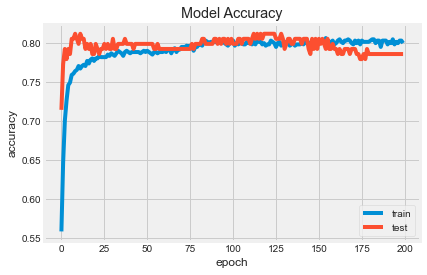

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

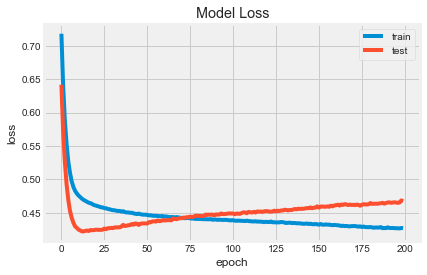

In [29]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [30]:
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [31]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 78.57 %


# Convolutional Neural Network

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [33]:
X_train.shape

(614, 8)

In [34]:
X_test.shape

(154, 8)

In [35]:
x_train = X_train.reshape(614,8,1)
x_test = X_test.reshape(154,8,1)

In [36]:
epochs = 100
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(8,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 7, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 32)             2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 32)             128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)            

In [38]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005),metrics=['accuracy'])

C:\Users\ANKIT\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [39]:
hists = model.fit(x_train, Y_train,validation_data=(x_test, Y_test), epochs=200, verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 10ms/step - loss: 1.3487 - accuracy: 0.4430 - val_loss: 0.6906 - val_accuracy: 0.5260
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.3368 - accuracy: 0.4397 - val_loss: 0.6831 - val_accuracy: 0.6688
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 1.3156 - accuracy: 0.4528 - val_loss: 0.6761 - val_accuracy: 0.6883
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.4479 - val_loss: 0.6694 - val_accuracy: 0.7013
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 1.2744 - accuracy: 0.4300 - val_loss: 0.6625 - val_accuracy: 0.6818
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 1.2613 - accuracy: 0.4788 - val_loss: 0.6548 - val_accuracy: 0.6818
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 1.2426 - accuracy: 0.4593 - val_loss: 0.6478 - val_accuracy: 0.6948
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8190 - accuracy: 0.6205 - val_loss: 0.4915 - val_accuracy: 0.7857
Epoch 60/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8301 - accuracy: 0.6075 - val_loss: 0.4908 - val_accuracy: 0.7857
Epoch 61/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8448 - accuracy: 0.6319 - val_loss: 0.4906 - val_accuracy: 0.7857
Epoch 62/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8139 - accuracy: 0.5831 - val_loss: 0.4903 - val_accuracy: 0.7857
Epoch 63/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7611 - accuracy: 0.6368 - val_loss: 0.4896 - val_accuracy: 0.7857
Epoch 64/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8553 - accuracy: 0.6124 - val_loss: 0.4889 - val_accuracy: 0.7857
Epoch 65/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8089 - accuracy: 0.5961 - val_loss: 0.4887 - val_accuracy: 0.7857
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.7492 - accuracy: 0.6450 - val_loss: 0.4673 - val_accuracy: 0.7792
Epoch 117/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.6612 - val_loss: 0.4673 - val_accuracy: 0.7792
Epoch 118/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.6661 - val_loss: 0.4665 - val_accuracy: 0.7792
Epoch 119/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.6482 - val_loss: 0.4665 - val_accuracy: 0.7792
Epoch 120/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.6482 - val_loss: 0.4663 - val_accuracy: 0.7792
Epoch 121/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.6792 - val_loss: 0.4661 - val_accuracy: 0.7792
Epoch 122/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.6401 - val_loss: 0.4662 - val_accuracy: 0.7792
Epoch 123/200

20/20 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.6710 - val_loss: 0.4538 - val_accuracy: 0.7987
Epoch 174/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.6596 - val_loss: 0.4531 - val_accuracy: 0.7987
Epoch 175/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.6824 - val_loss: 0.4531 - val_accuracy: 0.8052
Epoch 176/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.6726 - val_loss: 0.4530 - val_accuracy: 0.7987
Epoch 177/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.6661 - val_loss: 0.4532 - val_accuracy: 0.7987
Epoch 178/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6938 - val_loss: 0.4529 - val_accuracy: 0.7987
Epoch 179/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6629 - val_loss: 0.4530 - val_accuracy: 0.7987
Epoch 180/200

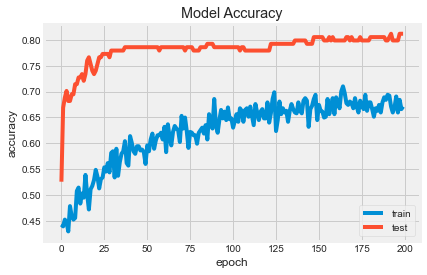

In [40]:
# Model accuracy
plt.plot(hists.history['accuracy'])
plt.plot(hists.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

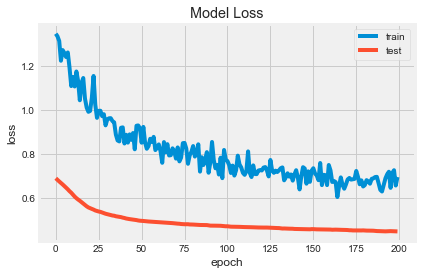

In [42]:
# Model Losss
plt.plot(hists.history['loss'])
plt.plot(hists.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [43]:
# Predicting the Test set results
y_pred_cnn = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred_cnn]
Y_pred_cnn = rounded

In [44]:
score_cnn = round(accuracy_score(Y_pred_cnn,Y_test)*100,2)

print("The accuracy score achieved using artificial Neural Network is: "+str(score_cnn)+" %")

The accuracy score achieved using artificial Neural Network is: 81.17 %


# Artificial Neural Network

In [45]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [46]:
# Intinialising the ANN
classifier = Sequential()

# Adding the input layer and the first Hidden layer 
classifier.add(Dense(activation="relu", input_dim=8, units=7, kernel_initializer="uniform"))

# Adding the output layer 
classifier.add(Dense(activation="sigmoid", input_dim=8, units=1, kernel_initializer="uniform"))

In [47]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
# Fitting the ANN to the training set
hist = classifier.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=10, epochs=500)

Epoch 1/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6352 - val_loss: 0.6728 - val_accuracy: 0.6948
Epoch 2/500
62/62 [==============================] - 0s 984us/step - loss: 0.6605 - accuracy: 0.6726 - val_loss: 0.6264 - val_accuracy: 0.7662
Epoch 3/500
62/62 [==============================] - 0s 869us/step - loss: 0.6157 - accuracy: 0.7508 - val_loss: 0.5661 - val_accuracy: 0.7987
Epoch 4/500
62/62 [==============================] - 0s 951us/step - loss: 0.5697 - accuracy: 0.7573 - val_loss: 0.5189 - val_accuracy: 0.8052
Epoch 5/500
62/62 [==============================] - 0s 885us/step - loss: 0.5362 - accuracy: 0.7590 - val_loss: 0.4861 - val_accuracy: 0.7792
Epoch 6/500
62/62 [==============================] - 0s 902us/step - loss: 0.5154 - accuracy: 0.7573 - val_loss: 0.4667 - val_accuracy: 0.7792
Epoch 7/500
62/62 [==============================] - 0s 924us/step - loss: 0.5020 - accuracy: 0.7476 - val_loss: 0.4521 - val_accuracy: 0.7857
E

Epoch 58/500
62/62 [==============================] - 0s 907us/step - loss: 0.4551 - accuracy: 0.7818 - val_loss: 0.4364 - val_accuracy: 0.7922
Epoch 59/500
62/62 [==============================] - 0s 887us/step - loss: 0.4545 - accuracy: 0.7834 - val_loss: 0.4379 - val_accuracy: 0.7857
Epoch 60/500
62/62 [==============================] - 0s 896us/step - loss: 0.4549 - accuracy: 0.7801 - val_loss: 0.4388 - val_accuracy: 0.7857
Epoch 61/500
62/62 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.7834 - val_loss: 0.4383 - val_accuracy: 0.7857
Epoch 62/500
62/62 [==============================] - 0s 926us/step - loss: 0.4539 - accuracy: 0.7834 - val_loss: 0.4393 - val_accuracy: 0.7857
Epoch 63/500
62/62 [==============================] - 0s 863us/step - loss: 0.4531 - accuracy: 0.7834 - val_loss: 0.4393 - val_accuracy: 0.7857
Epoch 64/500
62/62 [==============================] - 0s 907us/step - loss: 0.4533 - accuracy: 0.7866 - val_loss: 0.4405 - val_accuracy: 0

Epoch 115/500
62/62 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7883 - val_loss: 0.4457 - val_accuracy: 0.7922
Epoch 116/500
62/62 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7883 - val_loss: 0.4471 - val_accuracy: 0.7922
Epoch 117/500
62/62 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7850 - val_loss: 0.4450 - val_accuracy: 0.7922
Epoch 118/500
62/62 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7883 - val_loss: 0.4454 - val_accuracy: 0.7922
Epoch 119/500
62/62 [==============================] - 0s 860us/step - loss: 0.4414 - accuracy: 0.7915 - val_loss: 0.4447 - val_accuracy: 0.7922
Epoch 120/500
62/62 [==============================] - 0s 927us/step - loss: 0.4402 - accuracy: 0.7866 - val_loss: 0.4461 - val_accuracy: 0.7922
Epoch 121/500
62/62 [==============================] - 0s 885us/step - loss: 0.4402 - accuracy: 0.7883 - val_loss: 0.4468 - val_accuracy: 

Epoch 172/500
62/62 [==============================] - 0s 824us/step - loss: 0.4294 - accuracy: 0.7964 - val_loss: 0.4517 - val_accuracy: 0.7922
Epoch 173/500
62/62 [==============================] - 0s 843us/step - loss: 0.4294 - accuracy: 0.7964 - val_loss: 0.4517 - val_accuracy: 0.7922
Epoch 174/500
62/62 [==============================] - 0s 834us/step - loss: 0.4290 - accuracy: 0.7980 - val_loss: 0.4536 - val_accuracy: 0.7987
Epoch 175/500
62/62 [==============================] - 0s 834us/step - loss: 0.4284 - accuracy: 0.7997 - val_loss: 0.4540 - val_accuracy: 0.7922
Epoch 176/500
62/62 [==============================] - 0s 833us/step - loss: 0.4286 - accuracy: 0.7980 - val_loss: 0.4533 - val_accuracy: 0.7922
Epoch 177/500
62/62 [==============================] - 0s 835us/step - loss: 0.4287 - accuracy: 0.7964 - val_loss: 0.4531 - val_accuracy: 0.7922
Epoch 178/500
62/62 [==============================] - 0s 859us/step - loss: 0.4282 - accuracy: 0.7964 - val_loss: 0.4539 - val_ac

Epoch 229/500
62/62 [==============================] - 0s 861us/step - loss: 0.4232 - accuracy: 0.8078 - val_loss: 0.4580 - val_accuracy: 0.8052
Epoch 230/500
62/62 [==============================] - 0s 867us/step - loss: 0.4230 - accuracy: 0.8046 - val_loss: 0.4586 - val_accuracy: 0.8052
Epoch 231/500
62/62 [==============================] - 0s 849us/step - loss: 0.4237 - accuracy: 0.8013 - val_loss: 0.4586 - val_accuracy: 0.8052
Epoch 232/500
62/62 [==============================] - 0s 816us/step - loss: 0.4229 - accuracy: 0.8062 - val_loss: 0.4602 - val_accuracy: 0.8052
Epoch 233/500
62/62 [==============================] - 0s 860us/step - loss: 0.4221 - accuracy: 0.8078 - val_loss: 0.4589 - val_accuracy: 0.8052
Epoch 234/500
62/62 [==============================] - 0s 847us/step - loss: 0.4223 - accuracy: 0.8029 - val_loss: 0.4598 - val_accuracy: 0.7987
Epoch 235/500
62/62 [==============================] - 0s 943us/step - loss: 0.4222 - accuracy: 0.8094 - val_loss: 0.4593 - val_ac

62/62 [==============================] - 0s 946us/step - loss: 0.4179 - accuracy: 0.8094 - val_loss: 0.4612 - val_accuracy: 0.8182
Epoch 286/500
62/62 [==============================] - 0s 886us/step - loss: 0.4175 - accuracy: 0.8127 - val_loss: 0.4621 - val_accuracy: 0.8182
Epoch 287/500
62/62 [==============================] - 0s 916us/step - loss: 0.4178 - accuracy: 0.8111 - val_loss: 0.4619 - val_accuracy: 0.8117
Epoch 288/500
62/62 [==============================] - 0s 921us/step - loss: 0.4179 - accuracy: 0.8225 - val_loss: 0.4610 - val_accuracy: 0.8182
Epoch 289/500
62/62 [==============================] - 0s 955us/step - loss: 0.4177 - accuracy: 0.8143 - val_loss: 0.4617 - val_accuracy: 0.8052
Epoch 290/500
62/62 [==============================] - 0s 949us/step - loss: 0.4172 - accuracy: 0.8127 - val_loss: 0.4614 - val_accuracy: 0.8182
Epoch 291/500
62/62 [==============================] - 0s 878us/step - loss: 0.4173 - accuracy: 0.8160 - val_loss: 0.4613 - val_accuracy: 0.8182

62/62 [==============================] - 0s 955us/step - loss: 0.4146 - accuracy: 0.8143 - val_loss: 0.4679 - val_accuracy: 0.8117
Epoch 342/500
62/62 [==============================] - 0s 978us/step - loss: 0.4147 - accuracy: 0.8160 - val_loss: 0.4670 - val_accuracy: 0.8182
Epoch 343/500
62/62 [==============================] - 0s 926us/step - loss: 0.4145 - accuracy: 0.8111 - val_loss: 0.4687 - val_accuracy: 0.8117
Epoch 344/500
62/62 [==============================] - 0s 896us/step - loss: 0.4148 - accuracy: 0.8111 - val_loss: 0.4670 - val_accuracy: 0.8117
Epoch 345/500
62/62 [==============================] - 0s 863us/step - loss: 0.4144 - accuracy: 0.8127 - val_loss: 0.4688 - val_accuracy: 0.8117
Epoch 346/500
62/62 [==============================] - 0s 846us/step - loss: 0.4145 - accuracy: 0.8127 - val_loss: 0.4691 - val_accuracy: 0.8052
Epoch 347/500
62/62 [==============================] - 0s 855us/step - loss: 0.4146 - accuracy: 0.8111 - val_loss: 0.4681 - val_accuracy: 0.8117

62/62 [==============================] - 0s 870us/step - loss: 0.4130 - accuracy: 0.8143 - val_loss: 0.4758 - val_accuracy: 0.8117
Epoch 398/500
62/62 [==============================] - 0s 958us/step - loss: 0.4132 - accuracy: 0.8143 - val_loss: 0.4761 - val_accuracy: 0.8117
Epoch 399/500
62/62 [==============================] - 0s 875us/step - loss: 0.4131 - accuracy: 0.8143 - val_loss: 0.4769 - val_accuracy: 0.8117
Epoch 400/500
62/62 [==============================] - 0s 934us/step - loss: 0.4129 - accuracy: 0.8176 - val_loss: 0.4768 - val_accuracy: 0.8117
Epoch 401/500
62/62 [==============================] - 0s 861us/step - loss: 0.4132 - accuracy: 0.8143 - val_loss: 0.4767 - val_accuracy: 0.8117
Epoch 402/500
62/62 [==============================] - 0s 862us/step - loss: 0.4129 - accuracy: 0.8160 - val_loss: 0.4768 - val_accuracy: 0.8117
Epoch 403/500
62/62 [==============================] - 0s 905us/step - loss: 0.4130 - accuracy: 0.8160 - val_loss: 0.4774 - val_accuracy: 0.8117

62/62 [==============================] - 0s 880us/step - loss: 0.4118 - accuracy: 0.8127 - val_loss: 0.4803 - val_accuracy: 0.8052
Epoch 454/500
62/62 [==============================] - 0s 925us/step - loss: 0.4116 - accuracy: 0.8160 - val_loss: 0.4823 - val_accuracy: 0.8052
Epoch 455/500
62/62 [==============================] - 0s 926us/step - loss: 0.4122 - accuracy: 0.8094 - val_loss: 0.4824 - val_accuracy: 0.8052
Epoch 456/500
62/62 [==============================] - 0s 875us/step - loss: 0.4114 - accuracy: 0.8062 - val_loss: 0.4819 - val_accuracy: 0.8052
Epoch 457/500
62/62 [==============================] - 0s 875us/step - loss: 0.4120 - accuracy: 0.8127 - val_loss: 0.4815 - val_accuracy: 0.8117
Epoch 458/500
62/62 [==============================] - 0s 877us/step - loss: 0.4117 - accuracy: 0.8111 - val_loss: 0.4813 - val_accuracy: 0.8052
Epoch 459/500
62/62 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8143 - val_loss: 0.4800 - val_accuracy: 0.8052
E

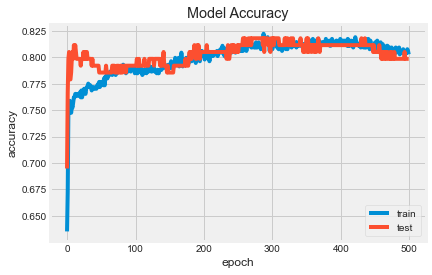

In [49]:
# Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

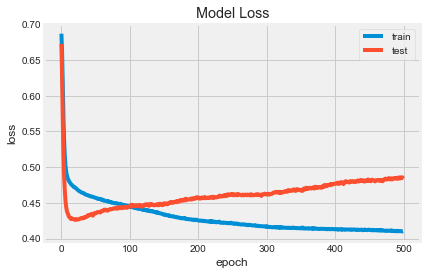

In [50]:
# Model Losss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [51]:
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)
rounded = [round(x[0]) for x in y_pred_ann]
Y_pred_ann = rounded

In [52]:
score_ann = round(accuracy_score(Y_pred_ann,Y_test)*100,2)

print("The accuracy score achieved using artificial Neural Network is: "+str(score_ann)+" %")

The accuracy score achieved using artificial Neural Network is: 79.87 %


## model with best score

In [53]:
scores = [score_lr,score_nb,score_svm,score_knn,score_xgb,score_nn,score_ann,score_cnn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","XGBoost","Neural Network","Art. Neural Network","Conv. Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 82.47 %
The accuracy score achieved using Naive Bayes is: 79.22 %
The accuracy score achieved using Support Vector Machine is: 81.82 %
The accuracy score achieved using K-Nearest Neighbors is: 75.97 %
The accuracy score achieved using XGBoost is: 75.97 %
The accuracy score achieved using Neural Network is: 78.57 %
The accuracy score achieved using Art. Neural Network is: 79.87 %
The accuracy score achieved using Conv. Neural Network is: 81.17 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

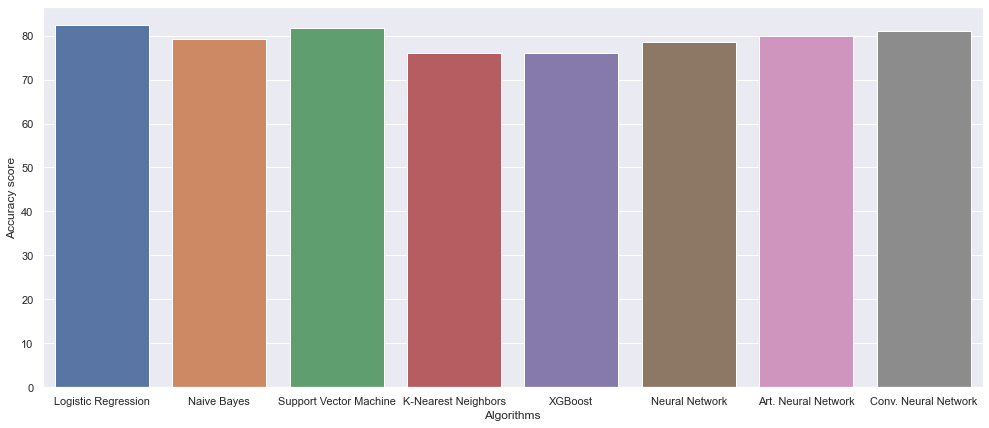

In [54]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)